# LBR iiwa 14 R820

In [2]:
import pandas as pd
import time
import sim as vrep
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from numpy import sin, cos, pi, arctan2
from funciones_python.funciones_cinematica import *

# CINEMATICA DIRECTA

In [3]:
#q = [0, pi/2, 0, -pi/2, 0, pi/2, 0]
#q = [0, 0, 0, +pi/2, 0, 0, 0]
q = [0, 0, 0, 0, pi/2, 0, 0]

In [4]:
H, x, y, z, phi, theta, psi = cinematica_directa(q)

print("Matriz Homogenea D-H")
print(H)
print("\nPosicion Final")
print("x: {} m".format(x))
print("y: {} m".format(y))
print("z: {} m".format(z))
print("\nAngulos de Euler")
print("ϕ: {}°".format(phi*180/pi))
print("θ: {}°".format(theta*180/pi))
print("ψ: {}°".format(psi*180/pi))

Matriz Homogenea D-H
[[ 0.     0.    -1.     0.   ]
 [ 1.     0.     0.     0.   ]
 [ 0.    -1.     0.     1.306]
 [ 0.     0.     0.     1.   ]]

Posicion Final
x: 0.0 m
y: 0.0 m
z: 1.306 m

Angulos de Euler
ϕ: 180.0°
θ: 90.0°
ψ: -90.0°


# CINEMATICA INVERSA

## Metodo analitico (Desacoplamiento Cinematico)

In [5]:
randx = 0.8*np.random.rand() - 0.4
randy = 0.8*np.random.rand() - 0.4
randz = 0.4*np.random.rand()

orx = 4*pi*np.random.rand()-2*pi
ory = 4*pi*np.random.rand()-2*pi
orz = 4*pi*np.random.rand()-2*pi

pos_deseada = [randx, randy, randz]
orientacion = [orx, ory, orz]

#pos_deseada = [0.526, 0, 0.78]
#orientacion = [pi/2, pi/2, 0]

print(np.array(pos_deseada))
print(np.array(orientacion)*180/pi)

[-0.06487119  0.25223051  0.35815189]
[ 73.61756037 196.69960054  26.92858198]


In [6]:
start = time.time()
q = cinematica_inversa(pos_deseada, orientacion, error=0.000001)
print("Tiempo computacional: {} ms".format((time.time()-start)*1000))
print('\nUbicacion rotacional de las articulaciones')
print('q1 = {}'.format(q[0]*180/pi))
print('q2 = {}'.format(q[1]*180/pi))
print('q3 = {}'.format(q[2]*180/pi))
print('q4 = {}'.format(q[3]*180/pi))
print('q5 = {}'.format(q[4]*180/pi))
print('q6 = {}'.format(q[5]*180/pi))
print('q7 = {}'.format(q[6]*180/pi))

Tiempo computacional: 183.00414085388184 ms

Ubicacion rotacional de las articulaciones
q1 = 115.05441301640163
q2 = 32.48724644646158
q3 = 0.0
q4 = 126.15111499759557
q5 = 154.65200755070666
q6 = -117.03750474108105
q7 = -114.02382643743738


In [7]:
H, x, y, z, phi, theta, psi = cinematica_directa(q)
print("x: {} m".format(x))
print("y: {} m".format(y))
print("z: {} m".format(z))
print("ϕ: {} °".format(phi*180/pi))
print("θ: {} °".format(theta*180/pi))
print("ψ: {} °".format(psi*180/pi))

x: -0.06487118870954028 m
y: 0.2522305141214505 m
z: 0.35815188864469005 m
ϕ: -106.38243962686307 °
θ: 163.30039945740631 °
ψ: -153.07141802313828 °


In [8]:
R_final = matriz_R_euler(phi, theta, psi)
print(R_final)
print(angulos_euler(R_final))

[[-0.67535265 -0.73302804 -0.08104741]
 [-0.69156498  0.66763338 -0.27568741]
 [ 0.25619656 -0.13013667 -0.9578245 ]]
(-1.8567238377928486, 2.850129640353702, -2.6716002352003527)


In [9]:
print("Error en x: {} m ({} %)".format(pos_deseada[0]-x, 100*(pos_deseada[0]-x)/(pos_deseada[0]+1e-10)))
print("Error en y: {} m ({} %)".format(pos_deseada[1]-y, 100*(pos_deseada[1]-y)/(pos_deseada[1]+1e-10)))
print("Error en z: {} m ({} %)".format(pos_deseada[2]-z, 100*(pos_deseada[2]-z)/(pos_deseada[2]+1e-10)))
print("Error en ϕ: {} ° ({} %)".format((orientacion[0]-phi)*180/pi, 100*(orientacion[0]-phi)/(orientacion[0]+1e-10)))
print("Error en θ: {} ° ({} %)".format((orientacion[1]-theta)*180/pi, 100*(orientacion[1]-theta)/(orientacion[1]+1e-10)))
print("Error en ψ: {} ° ({} %)".format((orientacion[2]-psi)*180/pi, 100*(orientacion[2]-psi)/(orientacion[2]+1e-10)))

Error en x: 0.0 m (-0.0 %)
Error en y: -1.1102230246251565e-16 m (-4.401620589213944e-14 %)
Error en z: 0.0 m (0.0 %)
Error en ϕ: 180.00000000000003 ° (244.50687998032714 %)
Error en θ: 33.39920108518737 ° (16.979801175031962 %)
Error en ψ: 180.00000000000003 ° (668.4347512853284 %)


Observacion:
- El error relativo puede ser muy grande cuando el valor exacto es 0.
- El error en la orientacion se debe a las multiples soluciones que existe.

In [10]:
print("Error de R")
print(R_final - H[:3,:3])

Error de R
[[ 1.11022302e-16  0.00000000e+00  6.93889390e-17]
 [-1.11022302e-16 -1.11022302e-16  2.22044605e-16]
 [-1.66533454e-16  5.55111512e-17 -1.11022302e-16]]


# COMUNICACION CON EL SIMULADOR (CoppeliaSim)

In [11]:
def connect(port):
# Establece la conexión a VREP
# port debe coincidir con el puerto de conexión en VREP
# retorna el número de cliente o -1 si no puede establecer conexión
    vrep.simxFinish(-1) # just in case, close all opened connections
    clientID = vrep.simxStart('127.0.0.1',port,True,True,2000,5) # Conectarse
    if clientID == 0:
        vrep.simxAddStatusbarMessage(clientID,'Comunicacion con Python iniciada',vrep.simx_opmode_blocking);
        print('Comunicacion con Python iniciada');
    else: 
        print("no se pudo conectar")
    return clientID

In [12]:
# Conectarse al servidor de VREP
# *** ejecutar cada vez que se reinicia la simulación ***
clientID = connect(19999)

Comunicacion con Python iniciada


In [13]:
#q = np.array([0, 0, 0, 0, 0, 0, 0])
#q = q*np.pi/180

q = np.array([0,-pi/2,0,0,0,pi/2,0])

# Obtenemos los manejadores para cada una de las articulaciones del robot
ret,joint1 = vrep.simxGetObjectHandle(clientID,'joint1',vrep.simx_opmode_blocking)
ret,joint2 = vrep.simxGetObjectHandle(clientID,'joint2',vrep.simx_opmode_blocking)
ret,joint3 = vrep.simxGetObjectHandle(clientID,'joint3',vrep.simx_opmode_blocking)
ret,joint4 = vrep.simxGetObjectHandle(clientID,'joint4',vrep.simx_opmode_blocking)
ret,joint5 = vrep.simxGetObjectHandle(clientID,'joint5',vrep.simx_opmode_blocking)
ret,joint6 = vrep.simxGetObjectHandle(clientID,'joint6',vrep.simx_opmode_blocking)
ret,joint7 = vrep.simxGetObjectHandle(clientID,'joint7',vrep.simx_opmode_blocking)

# enviamos la posición de joint1, en radianes.
returnCode = vrep.simxSetJointTargetPosition(clientID, joint1, q[0], vrep.simx_opmode_oneshot)
returnCode = vrep.simxSetJointTargetPosition(clientID, joint2, q[1], vrep.simx_opmode_oneshot)
returnCode = vrep.simxSetJointTargetPosition(clientID, joint3, q[2], vrep.simx_opmode_oneshot)
returnCode = vrep.simxSetJointTargetPosition(clientID, joint4, q[3], vrep.simx_opmode_oneshot)
returnCode = vrep.simxSetJointTargetPosition(clientID, joint5, q[4], vrep.simx_opmode_oneshot)
returnCode = vrep.simxSetJointTargetPosition(clientID, joint6, q[5], vrep.simx_opmode_oneshot)
returnCode = vrep.simxSetJointTargetPosition(clientID, joint7, q[6], vrep.simx_opmode_oneshot)

In [14]:
# Obtenemos el manejador para el dummy 
returnCode,handle=vrep.simxGetObjectHandle(clientID,'Dummy',vrep.simx_opmode_blocking)
# A partir de su manejador podemos accionar sobre el objeto,
# por ejemplo, obtener su posición
returnCode,pos = vrep.simxGetObjectPosition(clientID, handle, -1, vrep.simx_opmode_blocking)
final = np.array(pos) - np.array([-0.009147586300969124, -0.002803649054840207, 1.3055205345153809-1.306])
print(final)

[-0.811185    0.00282343  0.48523716]


In [15]:
print("Error en x: {} m ({} %)".format(pos_deseada[0]-final[0], 100*(pos_deseada[0]-final[0])/(pos_deseada[0]+1e-10)))
print("Error en y: {} m ({} %)".format(pos_deseada[1]-final[1], 100*(pos_deseada[1]-final[1])/(pos_deseada[1]+1e-10)))
print("Error en z: {} m ({} %)".format(pos_deseada[2]-final[2], 100*(pos_deseada[2]-final[2])/(pos_deseada[2]+1e-10)))

Error en x: 0.7463138117547798 m (-1150.454967376724 %)
Error en y: 0.249407084004318 m (98.88061512864637 %)
Error en z: -0.12708526846170953 m (-35.483623695840045 %)


### Cinemtica diferencial

In [22]:
# Curva parametrizada que recorrera el manipulador robotico

t = np.arange(0,2*pi,0.001)
x = 0.7*np.ones(np.size(t))
y = 0.2*np.sin(t)
z = 0.2*np.cos(t) + 0.7

# tamaño de las muestras
n = np.size(t)
print(n)

6284


In [17]:
t = np.arange(0,2*pi,0.001)
x = 0.2*np.cos(t) + 0.6
y = 0.2*np.sin(t)
z = 0.6*(t/(2*pi)) + 0.2

# tamaño de las muestras
n = np.size(t)
print(n)

6284


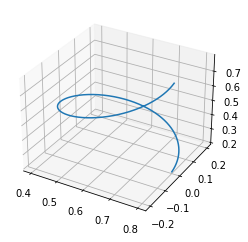

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(x,y,z)

plt.show()

In [19]:
cinematica_directa([0,pi/2,0,0,0,pi/2,0])

(array([[-1.   ,  0.   ,  0.   ,  0.82 ],
        [ 0.   ,  0.   ,  1.   ,  0.   ],
        [ 0.   ,  1.   ,  0.   ,  0.234],
        [ 0.   ,  0.   ,  0.   ,  1.   ]]),
 0.8200000000000001,
 0.0,
 0.23399999999999999,
 1.5707963267948966,
 1.5707963267948966,
 1.5707963267948966)

In [33]:
pos_inicial = [x[0], y[0], z[0]]
orientacion = [pi/2, pi/2, 0]
q = cinematica_inversa(pos_inicial, orientacion, error=0.000001)

# Obtenemos los manejadores para cada una de las articulaciones del robot
ret,joint1 = vrep.simxGetObjectHandle(clientID,'joint1',vrep.simx_opmode_blocking)
ret,joint2 = vrep.simxGetObjectHandle(clientID,'joint2',vrep.simx_opmode_blocking)
ret,joint3 = vrep.simxGetObjectHandle(clientID,'joint3',vrep.simx_opmode_blocking)
ret,joint4 = vrep.simxGetObjectHandle(clientID,'joint4',vrep.simx_opmode_blocking)
ret,joint5 = vrep.simxGetObjectHandle(clientID,'joint5',vrep.simx_opmode_blocking)
ret,joint6 = vrep.simxGetObjectHandle(clientID,'joint6',vrep.simx_opmode_blocking)
ret,joint7 = vrep.simxGetObjectHandle(clientID,'joint7',vrep.simx_opmode_blocking)

# enviamos la posición de joint1, en radianes.
returnCode = vrep.simxSetJointTargetPosition(clientID, joint1, q[0], vrep.simx_opmode_oneshot)
returnCode = vrep.simxSetJointTargetPosition(clientID, joint2, q[1], vrep.simx_opmode_oneshot)
returnCode = vrep.simxSetJointTargetPosition(clientID, joint3, q[2], vrep.simx_opmode_oneshot)
returnCode = vrep.simxSetJointTargetPosition(clientID, joint4, q[3], vrep.simx_opmode_oneshot)
returnCode = vrep.simxSetJointTargetPosition(clientID, joint5, q[4], vrep.simx_opmode_oneshot)
returnCode = vrep.simxSetJointTargetPosition(clientID, joint6, q[5], vrep.simx_opmode_oneshot)
returnCode = vrep.simxSetJointTargetPosition(clientID, joint7, q[6], vrep.simx_opmode_oneshot)

In [34]:
# Obtenemos los manejadores para cada una de las articulaciones del robot
ret,joint1 = vrep.simxGetObjectHandle(clientID,'joint1',vrep.simx_opmode_blocking)
ret,joint2 = vrep.simxGetObjectHandle(clientID,'joint2',vrep.simx_opmode_blocking)
ret,joint3 = vrep.simxGetObjectHandle(clientID,'joint3',vrep.simx_opmode_blocking)
ret,joint4 = vrep.simxGetObjectHandle(clientID,'joint4',vrep.simx_opmode_blocking)
ret,joint5 = vrep.simxGetObjectHandle(clientID,'joint5',vrep.simx_opmode_blocking)
ret,joint6 = vrep.simxGetObjectHandle(clientID,'joint6',vrep.simx_opmode_blocking)
ret,joint7 = vrep.simxGetObjectHandle(clientID,'joint7',vrep.simx_opmode_blocking)

for i in range(0, n):
    
    #time.sleep(0.1)
    pos_deseada = [x[i], y[i], z[i]]
    orientacion = [pi/2, pi/2, 0]
    q = cinematica_inversa(pos_deseada, orientacion, error=0.000001)

    # enviamos la posición de joint1, en radianes.
    returnCode = vrep.simxSetJointTargetPosition(clientID, joint1, q[0], vrep.simx_opmode_oneshot)
    returnCode = vrep.simxSetJointTargetPosition(clientID, joint2, q[1], vrep.simx_opmode_oneshot)
    returnCode = vrep.simxSetJointTargetPosition(clientID, joint3, q[2], vrep.simx_opmode_oneshot)
    returnCode = vrep.simxSetJointTargetPosition(clientID, joint4, q[3], vrep.simx_opmode_oneshot)
    returnCode = vrep.simxSetJointTargetPosition(clientID, joint5, q[4], vrep.simx_opmode_oneshot)
    returnCode = vrep.simxSetJointTargetPosition(clientID, joint6, q[5], vrep.simx_opmode_oneshot)
    returnCode = vrep.simxSetJointTargetPosition(clientID, joint7, q[6], vrep.simx_opmode_oneshot)
        
vrep.simxAddStatusbarMessage(clientID,'Finalizacion',vrep.simx_opmode_blocking);

## Metodos iterativos (Descenso del gradiente)

In [10]:
def matriz_homogenea_DH_simbolico(theta,d,a,alpha):
    
    ct = sp.cos(theta)
    st = sp.sin(theta)
    ca = sp.cos(alpha)
    sa = sp.sin(alpha)
    
    # VERIFICAMOS EL ANGULO "theta"
    if(abs(theta)==pi or abs(theta) == 2*pi):
        st = 0
    elif(abs(theta) == pi/2):
        ct = 0
        
    # VERIFICAMOS EL ANGULO "alpha"
    if(abs(alpha)==pi or abs(alpha) == 2*pi):
        sa = 0
    elif(abs(alpha) == pi/2):
        ca = 0
    
    h = [[ct, -st*ca, st*sa, a*ct],
         [st, ct*ca, -ct*sa, a*st],
         [0, sa, ca, d],
         [0, 0, 0, 1]]
    H = sp.Matrix(h)
    
    return H

In [11]:
q1 = sp.symbols('q1')
q2 = sp.symbols('q2')
q3 = sp.symbols('q3')
q4 = sp.symbols('q4')
q5 = sp.symbols('q5')
q6 = sp.symbols('q6')
q7 = sp.symbols('q7')

# Parametros D-H
theta = [q1, q2, q3, q4, q5, q6, q7]
d = [0.36, 0, 0.42, 0, 0.4, 0, 0.126]
a = [0, 0, 0, 0, 0, 0, 0]
alpha = [-pi/2, pi/2, -pi/2, pi/2, -pi/2, pi/2, -pi/2]

A1 = matriz_homogenea_DH_simbolico(theta[0], d[0], a[0], alpha[0])
A2 = matriz_homogenea_DH_simbolico(theta[1], d[1], a[1], alpha[1])
A3 = matriz_homogenea_DH_simbolico(theta[2], d[2], a[2], alpha[2])
A4 = matriz_homogenea_DH_simbolico(theta[3], d[3], a[3], alpha[3])
A5 = matriz_homogenea_DH_simbolico(theta[4], d[4], a[4], alpha[4])
A6 = matriz_homogenea_DH_simbolico(theta[5], d[5], a[5], alpha[5])
A7 = matriz_homogenea_DH_simbolico(theta[6], d[6], a[6], alpha[6])

T1 = A1
T2 = T1*A2
T3 = T2*A3
T4 = T3*A4
T5 = T4*A5
T6 = T5*A6
T7 = T6*A7

H = T7

In [15]:
P = T7[0:4,3] # funcion de la posicion f(q1,q2,...)
pos_deseada = [0.2, 0.1, 0.7] #[0, 0, 1.306]
q = sp.Matrix([q1, q2, q3, q4, q5, q6, q7])
F = sp.Matrix([(P[0]-pos_deseada[0])**2 + (P[1]-pos_deseada[1])**2 + (P[2]-pos_deseada[2])**2]) # Funcion de costo
J = F.jacobian(q)

start = time.time()
q = np.reshape(np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]), (1,7))
alpha = 0.8;

for i in range(0,100):
    dJ = J.subs({q1:q[0,0], q2:q[0,1], q3:q[0,2], q4:q[0,3], q5:q[0,4], q6:q[0,5], q7:q[0,6]})
    dJ = np.array(dJ)
    q = q - alpha*dJ
    print(i, end=' ')
    
q = np.array(q)
q = np.reshape(q, (7,))
q = np.float64(q)
print("\n")
print("Tiempo computacional: {} s".format((time.time()-start)))
print('\nUbicacion rotacional de las articulaciones')
print('q1 = {} °'.format(q[0]*180/pi))
print('q2 = {} °'.format(q[1]*180/pi))
print('q3 = {} °'.format(q[2]*180/pi))
print('q4 = {} °'.format(q[3]*180/pi))
print('q5 = {} °'.format(q[4]*180/pi))
print('q6 = {} °'.format(q[5]*180/pi))
print('q7 = {} °'.format(q[6]*180/pi))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

Tiempo computacional: 34.68476057052612 s

Ubicacion rotacional de las articulaciones
q1 = 2.8878566717795424 °
q2 = -32.898757946160096 °
q3 = 8.234770539125389 °
q4 = 108.41247957983454 °
q5 = 17.81096773380254 °
q6 = 78.69598893332879 °
q7 = 28.64788975654116 °


In [16]:
H, x, y, z, phi, theta, psi = cinematica_directa(q)
print("x: {} m".format(x))
print("y: {} m".format(y))
print("z: {} m".format(z))
print("ϕ: {} °".format(phi*180/pi))
print("θ: {} °".format(theta*180/pi))
print("ψ: {} °".format(psi*180/pi))

x: 0.20000007010391885 m
y: 0.10000004095976564 m
z: 0.700000028373293 m
ϕ: 76.17512959822002 °
θ: 66.53239956963792 °
ψ: 73.08728443845087 °


In [17]:
print("Error en x: {} m ({} %)".format(pos_deseada[0]-x, 100*(pos_deseada[0]-x)/(pos_deseada[0]+1e-10)))
print("Error en y: {} m ({} %)".format(pos_deseada[1]-y, 100*(pos_deseada[1]-y)/(pos_deseada[1]+1e-10)))
print("Error en z: {} m ({} %)".format(pos_deseada[2]-z, 100*(pos_deseada[2]-z)/(pos_deseada[2]+1e-10)))
print("\nNota: El error relativo puede ser muy grande cuando el valor exacto es 0")

Error en x: -7.010391883666145e-08 m (-3.505195940080474e-05 %)
Error en y: -4.095976563478487e-08 m (-4.0959765593825104e-05 %)
Error en z: -2.8373293048389314e-08 m (-4.053327577762284e-06 %)

Nota: El error relativo puede ser muy grande cuando el valor exacto es 0


In [58]:
(20.682753149589786+25.383152188826905+2.8254776365220677)/3

16.29712765831292

## Descenso del gradiente (otra forma)

In [63]:
def funcion_costo(q, pos_deseada):
    H, _, _, _, _, _, _ = cinematica_directa(q)
    P = H[0:4,3]
    F = np.array([(P[0]-pos_deseada[0])**2 + (P[1]-pos_deseada[1])**2 + (P[2]-pos_deseada[2])**2]) # Funcion de costo
    return F

In [64]:
funcion_costo(q, pos_deseada)

array([1.2350225e-07])

In [65]:
np.zeros(7)

array([0., 0., 0., 0., 0., 0., 0.])

In [75]:
#pos_deseada = [0, 0, 1.306]
pos_deseada = [0.2, 0.1, 0.7]
q = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

h = 0.001
alpha = 0.05
deriv = np.zeros(7)
start = time.time()

for i in range(0,10000): #10000
    
    
    #for j in range(0,7):
    #    qc = q
    #    qc[j] = qc[j] + h
    #    deriv[j] = (funcion_costo(qc, pos_deseada) - funcion_costo(q, pos_deseada))/h
    
    deriv[0] = (funcion_costo([q[0]+h,q[1],q[2],q[3],q[4],q[5],q[6]], pos_deseada) - funcion_costo(q, pos_deseada))/h
    deriv[1] = (funcion_costo([q[0],q[1]+h,q[2],q[3],q[4],q[5],q[6]], pos_deseada) - funcion_costo(q, pos_deseada))/h
    deriv[2] = (funcion_costo([q[0],q[1],q[2]+h,q[3],q[4],q[5],q[6]], pos_deseada) - funcion_costo(q, pos_deseada))/h
    deriv[3] = (funcion_costo([q[0],q[1],q[2],q[3]+h,q[4],q[5],q[6]], pos_deseada) - funcion_costo(q, pos_deseada))/h
    deriv[4] = (funcion_costo([q[0],q[1],q[2],q[3],q[4]+h,q[5],q[6]], pos_deseada) - funcion_costo(q, pos_deseada))/h
    deriv[5] = (funcion_costo([q[0],q[1],q[2],q[3],q[4],q[5]+h,q[6]], pos_deseada) - funcion_costo(q, pos_deseada))/h
    deriv[6] = (funcion_costo([q[0],q[1],q[2],q[3],q[4],q[5],q[6]+h], pos_deseada) - funcion_costo(q, pos_deseada))/h
    
    q = q - alpha*deriv
    
    if(i%1000 == 0):
        print(i, end=' ')
    
print("Tiempo computacional: {} s".format((time.time()-start)))
print(q)

0 1000 2000 3000 4000 5000 6000 7000 8000 9000 Tiempo computacional: 15.300300121307373 s
[ 0.06913051 -0.57783944  0.13216465  1.89681248  0.31178492  1.35584912
  0.5       ]


In [76]:
H, x, y, z, phi, theta, psi = cinematica_directa(q)
print("x: {} m".format(x))
print("y: {} m".format(y))
print("z: {} m".format(z))
print("ϕ: {} °".format(phi*180/pi))
print("θ: {} °".format(theta*180/pi))
print("ψ: {} °".format(psi*180/pi))

x: 0.1999287596198592 m
y: 0.09982691120920253 m
z: 0.7002396147601797 m
ϕ: 76.76788061761575 °
θ: 65.72318619361262 °
ψ: 72.32230666117587 °


In [77]:
print("Error en x: {} m ({} %)".format(pos_deseada[0]-x, 100*(pos_deseada[0]-x)/(pos_deseada[0]+1e-10)))
print("Error en y: {} m ({} %)".format(pos_deseada[1]-y, 100*(pos_deseada[1]-y)/(pos_deseada[1]+1e-10)))
print("Error en z: {} m ({} %)".format(pos_deseada[2]-z, 100*(pos_deseada[2]-z)/(pos_deseada[2]+1e-10)))
print("\nNota: El error relativo puede ser muy grande cuando el valor exacto es 0")

Error en x: 7.124038014080791e-05 m (0.035620190052593856 %)
Error en y: 0.00017308879079747097 m (0.17308879062438218 %)
Error en z: -0.00023961476017975158 m (-0.034230680020788704 %)

Nota: El error relativo puede ser muy grande cuando el valor exacto es 0


## Otra forma (Usando funciones que implementan metodos numericos)

In [13]:
def matriz_R_euler_simbolico(phi, theta, psi):
    
    s_ph = sp.sin(phi)
    c_ph = sp.cos(phi)
    s_th = sp.sin(theta)
    c_th = sp.cos(theta)
    s_ps = sp.sin(psi)
    c_ps = sp.cos(psi)
    
    # VERIFICAMOS EL ANGULO "phi"
    if(abs(phi)==pi or abs(phi) == 2*pi):
        s_ph = 0
    elif(abs(phi) == pi/2):
        c_ph = 0

    # VERIFICAMOS EL ANGULO "theta"
    if(abs(theta)==pi or abs(theta) == 2*pi):
        s_th = 0
    elif(abs(theta) == pi/2):
        c_th = 0
        
    # VERIFICAMOS EL ANGULO "psi"
    if(abs(psi)==pi or abs(psi) == 2*pi):
        s_ps = 0
    elif(abs(psi) == pi/2):
        c_ps = 0
    
    r = [[c_ph*c_th*c_ps - s_ph*s_ps, -c_ph*c_th*s_ps - s_ph*c_ps, c_ph*s_th],
         [s_ph*c_th*c_ps + c_ph*s_ps, -s_ph*c_th*s_ps + c_ph*c_ps, s_ph*s_th],
         [-s_th*c_ps, s_th*s_ps, c_th]]
    R = sp.Matrix(r)
    
    return R

In [14]:
pos_deseada = [0.38608030252785497, 0.38608030252785497, 0.76]
orientacion= [3*pi/4, pi/2, 0]

R = matriz_R_euler_simbolico(orientacion[0], orientacion[1], orientacion[2])
RA = sp.Matrix([R.T, [pos_deseada[0], pos_deseada[1],  pos_deseada[2]]])
D = sp.Matrix([RA.T, [0,0,0,1]])
D

Matrix([
[   0, -0.707106781186548, -0.707106781186547, 0.386080302527855],
[   0, -0.707106781186547,  0.707106781186548, 0.386080302527855],
[-1.0,                  0,                  0,              0.76],
[   0,                  0,                  0,                 1]])

In [15]:
try:
    q = sp.nsolve((H-D), (q1, q2, q3, q4, q5, q6, q7), (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), prec=2)
except:
    print('no se encontró la solución')
    q = [0, 0, 0, 0]
q

no se encontró la solución


[0, 0, 0, 0]

# REDES NEURONALES

In [18]:
import tensorflow.keras as kr

In [19]:
new_model = kr.models.load_model('model_accuracy_86%')

In [25]:
randx = 0.8*np.random.rand() - 0.4
randy = 0.8*np.random.rand() - 0.4
randz = 0.4*np.random.rand()

orx = 4*pi*np.random.rand()-2*pi
ory = 4*pi*np.random.rand()-2*pi
orz = 4*pi*np.random.rand()-2*pi

pos_deseada = [randx, randy, randz]
orientacion = [orx, ory, orz]

#pos_deseada = [0.526, 0, 0.78]
#orientacion = [pi/2, pi/2, 0]

print(np.array(pos_deseada))
print(np.array(orientacion)*180/pi)

[-0.34462103  0.13739332  0.16594544]
[-244.66521315  150.13902423  127.03847524]


In [26]:
prueba = [pos_deseada, orientacion]
print(prueba)
print(type(prueba))
prueba = np.array(prueba).reshape(1,6)
prueba.shape

[[-0.34462102836858555, 0.13739332190561515, 0.16594543522786687], [-4.270213534552961, 2.620420308614408, 2.2172396696655756]]
<class 'list'>


(1, 6)

In [27]:
start = time.time()
q_rna = new_model.predict(prueba)
print("Tiempo computacional: {} ms".format((time.time()-start)*1000))
q = np.zeros(7)
q[0] = q_rna[0,0]
q[1] = q_rna[0,1]
q[2] = q_rna[0,2]
q[3] = q_rna[0,3]
q[4] = q_rna[0,4]
q[5] = q_rna[0,5]
q[6] = q_rna[0,6]

print('q1 = {}'.format(q[0]*180/pi))
print('q2 = {}'.format(q[1]*180/pi))
print('q3 = {}'.format(q[2]*180/pi))
print('q4 = {}'.format(q[3]*180/pi))
print('q5 = {}'.format(q[4]*180/pi))
print('q6 = {}'.format(q[5]*180/pi))
print('q7 = {}'.format(q[6]*180/pi))

Tiempo computacional: 33.52952003479004 ms
q1 = -8.413321151689571
q2 = 58.91083921403437
q3 = -0.0037590152870470126
q4 = 10.217232168097883
q5 = -47.59724215583896
q6 = -140.04540643999772
q7 = 251.25165050593725


In [28]:
H, x, y, z, phi, theta, psi = cinematica_directa(q)
print("x: {} m".format(x))
print("y: {} m".format(y))
print("z: {} m".format(z))
print("ϕ: {} °".format(phi*180/pi))
print("θ: {} °".format(theta*180/pi))
print("ψ: {} °".format(psi*180/pi))

x: 0.6257687791076241 m
y: -0.03215489173802544 m
z: 0.7359564444048337 m
ϕ: 37.50245066449754 °
θ: 26.39254672305388 °
ψ: -162.79360939894366 °


In [29]:
print("Error en x: {} m ({} %)".format(pos_deseada[0]-x, 100*(pos_deseada[0]-x)/(pos_deseada[0]+1e-10)))
print("Error en y: {} m ({} %)".format(pos_deseada[1]-y, 100*(pos_deseada[1]-y)/(pos_deseada[1]+1e-10)))
print("Error en z: {} m ({} %)".format(pos_deseada[2]-z, 100*(pos_deseada[2]-z)/(pos_deseada[2]+1e-10)))
print("Error en ϕ: {} ° ({} %)".format((orientacion[0]-phi)*180/pi, 100*(orientacion[0]-phi)/(orientacion[0]+1e-10)))
print("Error en θ: {} ° ({} %)".format((orientacion[1]-theta)*180/pi, 100*(orientacion[1]-theta)/(orientacion[1]+1e-10)))
print("Error en ψ: {} ° ({} %)".format((orientacion[2]-psi)*180/pi, 100*(orientacion[2]-psi)/(orientacion[2]+1e-10)))

Error en x: -0.9703898074762096 m (281.58171669081145 %)
Error en y: 0.1695482136436406 m (123.40353313293588 %)
Error en z: -0.5700110091769668 m (-343.4930331471709 %)
Error en ϕ: -282.1676638140239 ° (115.32806817460634 %)
Error en θ: 123.74647751092039 ° (82.42126131934457 %)
Error en ψ: 289.83208463976194 ° (228.14512223739698 %)


# Exportar data

In [ ]:
# SE GENERA DATOS USANDO LA CINEMATICA DIRECTA
n = 1000

X = []
Y = []
Z = []
PHI = []
THETA = []
PSI = []
Q1 = []
Q2 = []
Q3 = []
Q4 = []
Q5 = []
Q6 = []
Q7 = []

for i in range(0,n):
    q = 2*pi*np.random.rand(7, 1)-pi
    x, y, z, phi, theta, psi = datos_cinematica_directa(q)
    
    randx = 0.8*np.random.rand() - 0.4
    randy = 0.8*np.random.rand() - 0.4
    randz = 0.4*np.random.rand()

    pos_deseada = [randx, randy, randz]
    q = cinematica_inversa(pos_deseada, orientacion, error=0.000001)
    Q1.append(float(q[0]))
    Q2.append(float(q[1]))
    Q3.append(float(q[2]))
    Q4.append(float(q[3]))
    Q5.append(float(q[4]))
    Q6.append(float(q[5]))
    Q7.append(float(q[6]))
    X.append(x)
    Y.append(y)
    Z.append(z)
    PHI.append(phi)
    THETA.append(theta)
    PSI.append(psi)

In [10]:
# SE GENERA DATOS USANDO LA CINEMATICA INVERSA
n = 10000

X = []
Y = []
Z = []
PHI = []
THETA = []
PSI = []
Q1 = []
Q2 = []
Q3 = []
Q4 = []
Q5 = []
Q6 = []
Q7 = []

C = 0.34
D = 0.4
E = 0.4
i = 0
while 1:
    x = 2*(D+E)*(np.random.rand() - 0.5)
    y = 2*(D+E)*(np.random.rand() - 0.5)
    z = (C+D+E)*np.random.rand()
    
    # Espacio de trabajo
    if( (x**2+y**2+(z-C)**2) >= C**2 and (x**2+y**2+(z-C)**2) <= (D+E)**2 and z >= 0):
        pos_deseada[0] = x
        pos_deseada[1] = y
        pos_deseada[2] = z
        orientacion[0] = pi*np.random.rand()
        orientacion[1] = pi*np.random.rand()
        orientacion[2] = pi*np.random.rand()
        q = cinematica_inversa(pos_deseada, orientacion, error=0.000001)
        X.append(float(x))
        Y.append(float(y))
        Z.append(float(z))
        PHI.append(orientacion[0])
        THETA.append(orientacion[1])
        PSI.append(orientacion[2])
        Q1.append(float(q[0]))
        Q2.append(float(q[1]))
        Q3.append(float(q[2]))
        Q4.append(float(q[3]))
        Q5.append(float(q[4]))
        Q6.append(float(q[5]))
        Q7.append(float(q[6]))
        i += 1
        if i == n: break

In [11]:
data = {'x':X, 'y':Y, 'z':Z, 'phi':PHI, 'theta':THETA, 'psi':PSI,
        'q1':Q1, 'q2':Q2, 'q3':Q3, 'q4':Q4, 'q5':Q5, 'q6':Q6, 'q7':Q7}
#data = {'x':X, 'y':Y, 'z':Z, 'q1':Q1, 'q2':Q2, 'q3':Q3, 'q4':Q4, 'q5':Q5, 'q6':Q6, 'q7':Q7}
df = pd.DataFrame(data)
df

,x,y,z,phi,theta,psi,q1,q2,q3,q4,q5,q6,q7
0,-0.541396,-0.507727,0.163232,2.479590,2.416790,1.003248,0.670615,-1.725471,0.0,-0.000000,0.638371,-2.186074,-0.336828
1,-0.519031,0.253564,0.392644,0.214625,0.942186,2.882185,2.891818,0.622340,0.0,1.732539,1.502674,-1.205165,1.689871
2,0.194361,-0.357258,0.683312,0.962901,1.827849,2.331687,-0.947306,0.186138,0.0,1.387607,2.620345,-2.197973,2.733622
3,0.454684,0.568969,0.031368,2.733181,1.814509,1.673578,0.941006,1.477768,0.0,0.755464,2.827526,-0.980814,3.117999
4,-0.376049,-0.336267,0.933223,0.311185,0.146444,1.388432,0.613712,-0.765404,0.0,-0.000000,2.424813,-2.359557,-2.075446
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.125722,-0.541198,0.177473,2.604010,2.796361,2.334236,-1.345676,0.966797,0.0,1.953614,-0.015488,-1.102643,-1.811005
9996,-0.345578,0.196319,0.187269,3.034485,1.748255,2.801285,2.394402,0.937538,0.0,1.885543,-2.328835,-1.449596,-2.710422
9997,0.600052,-0.299898,0.446559,1.692218,0.371799,0.829401,-0.645432,0.791493,0.0,1.231704,-1.811843,-1.444788,2.448335
9998,0.082431,-0.296169,0.679894,2.406636,3.108852,1.230222,-1.706557,-0.348852,0.0,2.097890,-1.555350,-1.310998,-0.165310


In [12]:
#dt.to_excel(r'dt.xlsx', index = False, float_format="%.4f")
df.to_excel(r'/Users/Usuario/Desktop/SIMULACION TESINA/datos_tesina.xlsx', index = False)